# SkillCraft1 Dataset Analysis

By Xin (Alex) Guo, Jan 2018

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Download the data

In [115]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv", 
                   na_values="?")
data = data.dropna()

## EDA

### Head Table

In [116]:
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


`LeagueIndex` is the label. All other variables are features.

In [117]:
X_init = data.drop(["LeagueIndex"], axis = 1)
y = data["LeagueIndex"]

### Scatter plot for y vs. all features

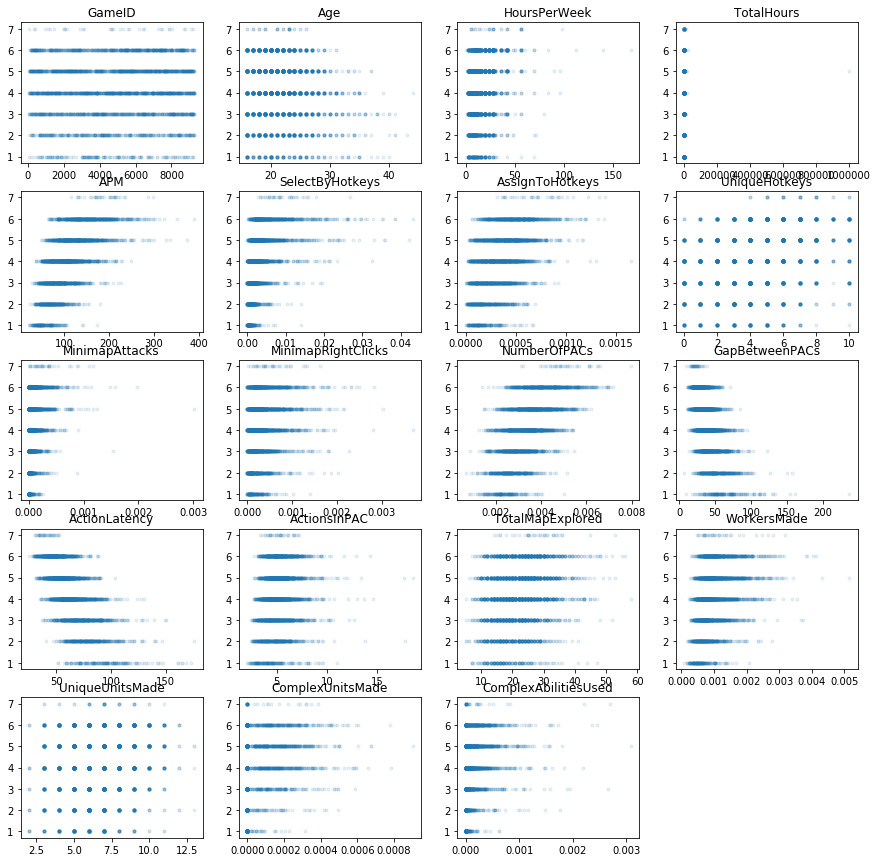

In [118]:
plt.figure(figsize=(15,15))
for i in range(0, X_init.shape[1]):
    plt.subplot(5,4,i+1)
    plt.plot(X_init.iloc[:,i], y, '.', alpha = 0.1)
    plt.title(X_init.columns.values[i])

All features seems relevant (have some patterns), except for `GameID`, which is uniformly distributed. It makes sense. `GameID` is the ID number for each game. It should not be a predictor. Let's remove it.

In [119]:
X = X_init.drop(["GameID"], axis = 1)
X.head()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,30.0,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,32.0,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [120]:
n = X.shape[0]
d = X.shape[1]

print("Number of observations:", n)
print("Number of features:", d)

Number of observations: 3338
Number of features: 18


## Feature and model selection

Since the label is categorical (1-8). Let's try Logistic Regression with L1 and L2 regularization, and tune the parameter `C` (the reciprocal of the regularization parameter) for the best result.

For L1 regularization:
Best C: 0.01
Training score: 0.40262172284644193
Test score: 0.4026946107784431


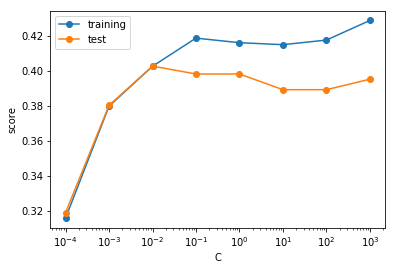

In [155]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)


# Logistic Regression with L1 regularization with different C
C_range = 10.0**np.arange(-4,4)
training_score1 = []
test_score1 = []

for C in C_range:
    LogReg_L1 = LogisticRegression(penalty="l1", C = C)
    LogReg_L1.fit(Xtrain, ytrain)  
    training_score1.append(LogReg_L1.score(Xtrain, ytrain))
    test_score1.append(LogReg_L1.score(Xtest, ytest))

plt.plot(C_range, training_score1, "o-", label = "training")
plt.plot(C_range, test_score1, "o-", label = "test")
plt.xscale("log")
plt.ylabel("score")
plt.xlabel("C")
plt.legend()

best_idx1 = np.argmax(test_score1)
print("For L1 regularization:")
print("Best C:", C_range[best_idx1])
print("Training score:", training_score1[best_idx1])
print("Test score:", test_score1[best_idx1])

For L2 regularization:
Best C: 0.01
Training score: 0.4153558052434457
Test score: 0.4026946107784431


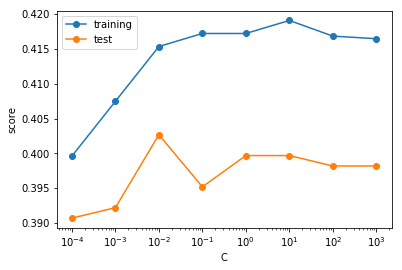

In [156]:
# Logistic Regression with L2 regularization with different C
C_range = 10.0**np.arange(-4,4)
training_score2 = []
test_score2 = []

for C in C_range:
    LogReg_L2 = LogisticRegression(penalty="l2", C = C)
    LogReg_L2.fit(Xtrain, ytrain)  
    training_score2.append(LogReg_L2.score(Xtrain, ytrain))
    test_score2.append(LogReg_L2.score(Xtest, ytest))

plt.plot(C_range, training_score2, "o-", label = "training")
plt.plot(C_range, test_score2, "o-", label = "test")
plt.xscale("log")
plt.ylabel("score")
plt.xlabel("C")
plt.legend()

best_idx2 = np.argmax(test_score2)
print("For L2 regularization:")
print("Best C:", C_range[best_idx2])
print("Training score:", training_score2[best_idx2])
print("Test score:", test_score2[best_idx2])

From the plots above, we can see that the performance of the two models are similar. Let's check how many features they used.

In [158]:
LogReg_L1 = LogisticRegression(penalty="l1", C = C_range[best_idx1])
LogReg_L1.fit(Xtrain, ytrain)
w1 = LogReg_L1.coef_
avg_n_selected_features1 = np.sum(abs(w1) > 1e-6)/w1.shape[0]
print("For L1 regularization:")
print("Average number of selected features:", avg_n_selected_features1)

For L1 regularization:
Average number of selected features: 5.857142857142857


In [157]:
LogReg_L2 = LogisticRegression(penalty="l2", C = C_range[best_idx2])
LogReg_L2.fit(Xtrain, ytrain)
w2 = LogReg_L2.coef_
avg_n_selected_features2 = np.sum(abs(w2) > 1e-6)/w2.shape[0]
print("For L2 regularization:")
print("Average number of selected features:", avg_n_selected_features2)

For L2 regularization:
Average number of selected features: 17.714285714285715


Since the label is categorical, logistic function will fit a regression model to each level. From the result above, we can see that the average number of selected features using in each level from the model with L1 regularization is much less than the one with L2 regularization. Therefore, we will choose the simpler model, which is Logistic Regression with L1 regularization.